# Project: Wrangling and Analyze Data

## Introduction

> The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive contains very basic tweet information. Additional gathering, then assessing and cleaning will be carried subsequently in this course for an insightful analyses and visualizations.

In this project, rigorous work will be done in the following three datasets;
- Enhanced Twitter Archive
- Image Predictions Data
- Twitter API Data

Import important packages

In [1]:
import requests
import numpy as np
import pandas as pd
import tweepy
import json
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl

In [2]:
# Set Chart fontsize
mpl.rcParams['font.size'] = 14
plt.style.use('ggplot')

# show full text for columns
#https://stackoverflow.com/questions/68490745/how-to-display-the-full-text-of-a-column-in-pandas

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 4000)

In [3]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#get response
response = requests.get(url)

#write return to an image
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [6]:
image_predict = pd.read_csv("image_predictions.tsv", sep='\t')

image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predict.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

__NOTE:__
Due to challenges in obtaining a twitter developer account, the udacity provided `tweet-json.txt` file was was used for this particular data gathering.

> The API query codes has been commented out in the following cell below for reference purpose ONLY

In [8]:
## import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
## These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [9]:
#https://towardsdatascience.com/flattening-json-objects-in-python-f5343c794b10
api_data = []

#read the created text file
with open("tweet-json.txt", "r") as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            #append a dictionary to the created list            
            api_data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]})               
        except:
            print("Error.") 
            
api_data = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
api_data.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,8853,39467,False,"[0, 85]"
1,892177421306343426,6514,33819,False,"[0, 138]"
2,891815181378084864,4328,25461,False,"[0, 121]"
3,891689557279858688,8964,42908,False,"[0, 79]"
4,891327558926688256,9774,41048,False,"[0, 138]"


In [10]:
api_data.shape

(2354, 5)

## Assessing Data
In this section, we detect and document quality issues and tidiness issue using both visual assessment and programmatic assessement.


Now we assess the data visually as well as programmatically using pandas for quality and tidiness issues

### 1. Assessing Twitter Archive Data

In [11]:
# first 5 rows of the twiter_archive dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [12]:
# last 5 rows of the twiter_archive dataset
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [13]:
# random sample of 5 rows of the twiter_archive dataset
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9,10,Philippe,None,None,None,None
109,871166179821445120,NaN,NaN,2017-06-04 00:46:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her https://t.co/X…,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000,https://twitter.com/dog_rates/status/841077006473256960/photo/1,12,10,Dawn,None,None,None,None
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1",12,10,Charlie,None,None,None,None
386,826615380357632002,NaN,NaN,2017-02-01 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Please only send in dogs. We only rate dogs, not seemingly heartbroken ewoks. Thank you... still 10/10 would console https:/…",8.099208e+17,4.196984e+09,2016-12-17 00:38:52 +0000,https://twitter.com/dog_rates/status/809920764300447744/photo/1,10,10,None,None,None,None,None
557,803380650405482500,NaN,NaN,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sonny. He's an in-home movie critic. That is his collection. He's very proud of it. 12/10 https://t.co/yPbCALoy2n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803380650405482500/photo/1,12,10,Sonny,None,None,None,None


Observation from visual assessment:

* not all tweets could be classified as doggo, floofer, pupper or puppo.
* the `source` column contains unnecessary HTML code
* the `name` columnn contains "None" and single characters (e.g 'a')

In [14]:
# Check if `expanded_urls` column contains some useful information
twitter_archive.expanded_urls.sample(15)

1034                                                                                                                                    https://twitter.com/dog_rates/status/745057283344719872/photo/1,https://twitter.com/dog_rates/status/745057283344719872/photo/1
1437                                                                                                                                                                                                    https://twitter.com/dog_rates/status/697242256848379904/photo/1
1432                                                                                                                                                                                                    https://twitter.com/dog_rates/status/697482927769255936/photo/1
1067                                                                                                                                                                                                    https://

In [15]:
#### Some tweets appear to have more than one expanded_urls. Let's determine these tweets

In [16]:
# check for tweets with two or more urls in the expanded urls
twitter_archive[twitter_archive.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

A total of 639 tweets contains more than one url

In [17]:
# Check for missing data
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### From the above, it is evident that there are missing data in the columns regarding the reply and the retweeted status. Since we only want original posts with images, these columns will be dropped before further explorations.

In [18]:
# view twitter_archive DataFrame info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Timestamp feature datatype should be datetime not string

In [19]:
# zoom in on dog name column
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Bailey            7
Toby              7
an                7
Buddy             7
Daisy             7
Scout             6
Milo              6
Dave              6
Rusty             6
Koda              6
Stanley           6
Oscar             6
Jack              6
Jax               6
Bella             6
Leo               6
Phil              5
               ... 
Monty             1
Maisey            1
Sephie            1
Ralphé            1
Gert              1
Poppy             1
Pete              1
Arya              1
Dotsy             1
Corey             1
Tripp             1
Jordy             1
Beemo             1
Ben               1
Grizz             1
Ferg              1
Maude             1
Longfellow        1
Cleopatricia      1


#### The above shows that there are inaccurate dog names in the dataset such as  "a", "Bo", "an", "None" 

#### Let's determine the number of tweets withouth a dog 'stage' category 

In [20]:
# Count dogs without category assigned
twitter_archive[twitter_archive.columns[-4:]].apply(lambda x: True if
    all([x[0] == "None", x[1] == "None", x[2] == "None",x[3] =="None"]) else False, axis = 1).value_counts()

True     1976
False     380
dtype: int64

#### A total of 1976 dog tweets were not categorized. Next, let's assess the rating numerator and denominator columns

In [21]:
# Check extrated rating numerator values and their counts
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
# check Extracted rating denominator and their counts
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
# Check text column for data quality issues
twitter_archive.text.sample(15)

1898                             Meet Patrick. He's an exotic pup. Jumps great distances for a dog. Always gets injured when I toss him a ball. 3/10 https://t.co/Unz1uNrOzo
410                                       This is Wyatt. He's got the fastest paws in the West. H*ckin deadly. 11/10 would ride into the sunset with https://t.co/stkJ377KK7
1926                                This is Stanley. Yes he is aware of the spoon's presence, he just doesn't know what he should do about it. 10/10 https://t.co/gQAMg5ypW5
2344                               Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx
1964                                                   This is Bella. She's a Genghis Flopped Canuck. Stuck in trash can. 9/10 not to happy about it https://t.co/RMv9EAv57u
941                                                                                     This is Carl. He's very powerful. 12/10 don't m

#### There seems to be float rating in the text column. Let's filter this out.

In [24]:
#https://regex101.com/

# Float Pattern of rating
float_pattern = r'\d+\.\d+\/\d+'

twitter_archive[twitter_archive.text.str.contains(float_pattern)] [['tweet_id','text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


#### These float ratings got transformed to integers at the point of extration. These are not accurate.

In [25]:
# Filtering out tweets with rating pattern occuring more than one
# rating numerator and denominator can be integer or float
pattern = '(\d+(\.\d+)?\/\d+(\.\d+)?)'

twitter_archive[twitter_archive.text.str.count(pattern)!=1][['tweet_id','text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
561,802624713319034886,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
860,763167063695355904,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,8,10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


#### From the above, it is evident that their are retweets in this data. And some tweets have pictures with cat and dog in it.

### 2. Assessing Twitter Dog Images Prediction Data

In [26]:
# first 5 rows of the dataset
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
# last 5 rows of the dataset
image_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [28]:
# display sample of data
image_predict.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1110,724004602748780546,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
490,675531475945709568,https://pbs.twimg.com/media/CV_4ShmUYAA3wNu.jpg,1,Pembroke,0.918441,True,Cardigan,0.027339,True,Siberian_husky,0.020221,True
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
1343,759047813560868866,https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg,1,Labrador_retriever,0.778546,True,bathing_cap,0.154254,False,golden_retriever,0.024972,True
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
1898,850753642995093505,https://pbs.twimg.com/media/C8576jrW0AEYWFy.jpg,1,pug,0.996952,True,bull_mastiff,0.000996,True,French_bulldog,0.000883,True


In [29]:
# print a summary of a DataFrame
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
# Check for retweets
image_predict.duplicated(subset='jpg_url').sum()

66

>There are 66 retweets in the image prediction data

In [31]:
#  Let's see if there are pictures for which no Algorithms predict to contain a dog
image_predict.query("p1_dog == False and p2_dog == False and p3_dog == False").shape

(324, 12)

>324 pictures resulted in a prediction of something else rather than Dog. Let's see some part of this

In [32]:
image_predict.query("p1_dog == False and p2_dog == False and p3_dog == False").head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False


Some were predicted to be box turtle, skunk, hen, guinea pig, cock etc. This looks exciting, let's dive in some more!

In [33]:
# Check for cases where the first algorithm did not predict dog, but at least one of the others did
image_predict.query("p1_dog == False and (p2_dog == True or p3_dog == True)").shape

(219, 12)

With 219 pictured being predicted non-dog by the first algorithm, this imply that sometimes the dogs are in the background or the pictures don't contain dogs at all. This could also imply that the algorithm has some pridiction inaccuracies in certain cases. Let's see some part of this

In [34]:
image_predict.query("p1_dog == False and (p2_dog == True or p3_dog == True)").head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False


In [35]:
# Number of pictures in a tweet 
image_predict.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [36]:
# Check the first algorithm maximum and minimum probability
image_predict.p1_conf.max(), image_predict.p1_conf.min()

(1.0, 0.044333400000000002)

In [37]:
# Check the second algorithm maximum and minimum probability
image_predict.p2_conf.max(), image_predict.p2_conf.min()

(0.48801400000000011, 1.0112999999999999e-08)

In [38]:
# Check the third algorithm maximum and minimum probability
image_predict.p3_conf.max(), image_predict.p3_conf.min()

(0.27341900000000002, 1.7401699999999998e-10)

In [39]:
# Check the first algorithm prediction counts
image_predict.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [40]:
# Check the second algorithm prediction counts
image_predict.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
malinois                           20
chow                               20
toy_terrier                        20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [41]:
# Check the third algorithm prediction counts
image_predict.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

__From the above, We observe the following:__ 
* __Underscore are used to separate predicted names instead of a whitespace.__
* __There are pictures with no prediciton of a dog or dogs being at the background.__
* __Inconsistent cases in predicition names__
* __There are 66 duplicates/retweets of pictures__

### 3. Assessing Data From Twitter API

In [42]:
# first 5 rows of api_data dataframe
api_data.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,8853,39467,False,"[0, 85]"
1,892177421306343426,6514,33819,False,"[0, 138]"
2,891815181378084864,4328,25461,False,"[0, 121]"
3,891689557279858688,8964,42908,False,"[0, 79]"
4,891327558926688256,9774,41048,False,"[0, 138]"


In [43]:
# last 5 rows of api_data dataframe
api_data.tail()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
2349,666049248165822465,41,111,False,"[0, 120]"
2350,666044226329800704,147,311,False,"[0, 137]"
2351,666033412701032449,47,128,False,"[0, 130]"
2352,666029285002620928,48,132,False,"[0, 139]"
2353,666020888022790149,532,2535,False,"[0, 131]"


In [44]:
# Check 15 random samples of api_data dataframe
api_data.sample(15)

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
88,875021211251597312,4922,26022,False,"[0, 115]"
694,786709082849828864,7069,20296,False,"[0, 104]"
820,770093767776997377,3520,0,False,"[0, 106]"
671,789903600034189313,4858,11673,False,"[0, 109]"
2269,667495797102141441,294,565,False,"[0, 140]"
1396,699775878809702401,690,2150,False,"[0, 140]"
713,784057939640352768,12953,33505,False,"[0, 108]"
2325,666407126856765440,44,113,False,"[0, 139]"
1317,706516534877929472,1150,3404,False,"[0, 126]"
1411,698907974262222848,699,2787,False,"[0, 83]"


In [45]:
# summary of API Data 
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
retweeted             2354 non-null bool
display_text_range    2354 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.9+ KB


In [46]:
# Check for retweets
api_data.query('retweeted ==True')

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range


>There are no retweets

In [47]:
# Check for data validity in the favorite count column
api_data.favorite_count.min(),api_data.favorite_count.max()

(0, 132810)

>#### Overall everything looks good for the API dataset,except for the `display_text_range` column that contaibs 2 variables

## ISSUES DISCOVERED ON EACH ASSESSED DATASET:

### 1. Twitter Archive Data

### Quality issues

1. Data contains retweets

2. Tthe `name` columnn contains "None" and some funny characters ('a', 'an' etc)

3. Some dogs are not classified as one of "doggo", "floofer", "pupper" or "puppo".

4. The source contains HTML code and not really sources

5.  Expanded url is more than one

6. Wrong datatype for Timestamp column

7. Wrong numerator ratings

### Tidiness issues
1. The columns doggo, floofer,pupper and puppo represent dog's stage and should be in one column

### 2. Image Prediction Data

### Quality issues

1. Contains 66 duplicated images/retweets

2. Some pictures are not predicted to contain dog by top prediction

3. Breed prediction contains inconsistent cases, and underscores are used to separate breed

### Tidiness issues

1. Contains `tweet_id`. Thus, it should be merged with the twitter archive dataset.

### 3. Twitter API Data

### Tidiness issues

1. `display_text_range` contains 2 variables

2. Contains `tweet_id`. Thus, it should be merged with the twitter archive dataset.

## Cleaning Data
In this section, we clean **all** of the issues documented while assessing. 

**Note:** We make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In [48]:
# Make copies of original pieces of data
twitter_archive_v1 = twitter_archive.copy()
image_predict_v1 = image_predict.copy()
api_data_v1 = api_data.copy()

## Clean 1: Twitter Archive Data

### Issue #1: Data Contains Retweets

#### Define:

* Remove columns with retweet and replies information
* Remove retweets data from the dataset

#### Code

In [49]:
# Check for Retweets
twitter_archive_v1.query('retweeted_status_id.notnull()',engine='python').shape

(181, 17)

>#### 181 rows are retweets. We will have to drop these, and the redundant columns

In [50]:
# drop retweets - rows that
twitter_archive_v1.query("retweeted_status_id.isnull()",engine='python', inplace=True)

In [51]:
# drop redundant columns
twitter_archive_v1.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [52]:
twitter_archive_v1.shape

(2175, 12)

In [53]:
twitter_archive_v1.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1391,700143752053182464,2016-02-18 02:24:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When it's Janet from accounting's birthday but you can't eat the cake cuz it's chocolate. 10/10 hang in there pupper https://t.co/Fbdr5orUrJ,https://twitter.com/dog_rates/status/700143752053182464/photo/1,10,10,None,None,None,pupper,None
956,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,doggo,None,pupper,None
1341,704847917308362754,2016-03-02 01:56:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yes hi could I get a number 4 with no pickles"" ...12/10 https://t.co/kQPVxqA3gq",https://twitter.com/dog_rates/status/704847917308362754/photo/1,12,10,None,None,None,None,None


### Issue #2: Dog Name contains "None", "a","by","the"

#### Define:

* Replace the wrong names with NaN

#### Code

In [54]:
for x in ["None", "a", "by", "the"]:
    twitter_archive_v1.name.replace(x, np.nan, inplace = True)

In [55]:
twitter_archive_v1.name.value_counts().head()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Name: name, dtype: int64

### Issue #3: Some dogs are not classified as "doggo", or "floofer", or  "pupper" or "puppo"

#### Define:

* Merge the columns doggo, floofer, pupper or puppo into one column.
* Extract Dog stage from the text column


#### Code

In [56]:
# Concatenate the stage columns to form a single column
twitter_archive_v1['dog_stage'] = twitter_archive_v1[['doggo', 'floofer',
       'pupper', 'puppo']].apply(lambda x: x[0]+x[1]+x[2]+x[3],axis=1).str.replace('None',"")

In [57]:
twitter_archive_v1['dog_stage'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

Some dogs have more than one stage category, and some do not have at all. Let's redo the extraction of the stage

In [58]:
# First replace "" with np.nan
twitter_archive_v1["dog_stage"].replace("", np.nan, inplace = True)

In [59]:
# Extract the dog stage from the text
dog_stage_pattern = r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b|\bpup\b|\bfloof\b|\bpups\b)'
twitter_archive_v1['dog_stage_ext'] = twitter_archive_v1['text'].apply(lambda x: x.lower()).str.extract(dog_stage_pattern)

In [60]:
#Check for the categories
twitter_archive_v1['dog_stage_ext'].value_counts()

pupper     227
pup        144
doggo       81
pups        24
puppo       24
floofer      9
floof        8
Name: dog_stage_ext, dtype: int64

>Now we have some abbreviations like pup, pups and floof in the extracted column. Let's clean those

In [61]:
#Replace 'pup' with pupper in the extracted column
twitter_archive_v1["dog_stage_ext"].replace('pup','pupper',inplace=True)

In [62]:
twitter_archive_v1.query('dog_stage_ext=="pups" and name!="None"')[['text','dog_stage','dog_stage_ext','name']]

,text,dog_stage,dog_stage_ext,name
88,You'll get your package when that precious man is done appreciating the pups. 13/10 for everyone https://t.co/PFp4MghzBW,NaN,pups,NaN
217,This is Leo. He's a personal triathlon coach. Currently overseeing this athlete's push-pups. H*ckin brutal. 13/10 would do all he asks of me https://t.co/FXZQtBcnTO,NaN,pups,Leo
219,This is Riley. He's making new friends. Jubilant as h*ck for the fun times ahead. 11/10 for all pups pictured https://t.co/PCX25VV78l,NaN,pups,Riley
921,Here's a heartwarming scene of a single father raising his two pups. Downright awe-inspiring af. 12/10 for everyone https://t.co/hfddJ0OiNR,NaN,pups,NaN
1281,This is Mister. He's a wonderful father to his two pups. Heartwarming af. 10/10 for all https://t.co/2KcuJXL2r4,NaN,pups,Mister
1317,Here's a sneak peek of me on spring break. 10/10 so many tired pups these days https://t.co/6aJrjKfNqX,NaN,pups,NaN
1421,Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https://t.co/GPaoH5qWEk,NaN,pups,Beau
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,NaN,pups,NaN
1481,This is Sadie and her 2 pups Shebang &amp; Ruffalo. Sadie says single parenting is challenging but rewarding. All 10/10 https://t.co/UzbhwXcLne,NaN,pups,Sadie
1595,Heartwarming scene here. Son reuniting w father after coming home from deployment. Very moving. 10/10 for both pups https://t.co/95JJevQOWW,NaN,pups,NaN


In [63]:
# get index of those categorized as "pups" but do not have a name
dog_stage_index = twitter_archive_v1.query('dog_stage_ext=="pups" and name!="None"').index

In [64]:
# Replace 'pups' with pupper in the newly extracted column
twitter_archive_v1.loc[dog_stage_index,'dog_stage_ext'] = 'pupper'

twitter_archive_v1["dog_stage_ext"].replace('pups',np.nan,inplace=True)

In [65]:
# Check for where dog stage is floof in the newly extratcted column
twitter_archive_v1.query('dog_stage_ext=="floof"')[['text','dog_stage','dog_stage_ext','name']]

,text,dog_stage,dog_stage_ext,name
25,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,floof,NaN
622,This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,NaN,floof,Yogi
740,Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,NaN,floof,NaN
744,We only rate dogs. Pls stop sending in non-canines like this Urban Floof Giraffe. I can't handle this. 11/10 https://t.co/zHIqpM5Gni,NaN,floof,NaN
819,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,NaN,floof,very
959,This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert https://t.co/wayKZkDRTG,NaN,floof,Gilbert
965,This is Arnie. He's a Nova Scotian Fridge Floof. Rare af. 12/10 https://t.co/lprdOylVpS,NaN,floof,Arnie
1597,This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg,NaN,floof,Flávio


#### Some of these are not dogs. We will have to change this to NaN

In [66]:
# Manually replace those that are not dogs with np.nan
twitter_archive_v1.loc[np.r_[25,744,819,959],['dog_stage_ext']] = np.nan

In [67]:
#Replace 'floof' with 'floofer' in the extracted column
twitter_archive_v1["dog_stage_ext"].replace('floof','floofer',inplace=True)

In [68]:
twitter_archive_v1["dog_stage_ext"].value_counts()

pupper     395
doggo       81
puppo       24
floofer     13
Name: dog_stage_ext, dtype: int64

In [69]:
# Check for where dog stage is doggo in the newly extratcted column but does not correspond to the formerly extratcted dog stage column
twitter_archive_v1.query('dog_stage_ext=="doggo"')[['text','dog_stage','dog_stage_ext','name']].query("dog_stage != dog_stage_ext")

,text,dog_stage,dog_stage_ext,name
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggofloofer,doggo,NaN
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggopupper,doggo,NaN
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper,doggo,Bones
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggopupper,doggo,Pinot
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper,doggo,Maggie
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper,doggo,NaN
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggopupper,doggo,NaN


>Those without a name are either not a dog or tweets with multiple dogs. Let's get this clean

In [70]:
# Extract the index of those not a dog from the extracted dog stage column
ind = twitter_archive_v1.query('dog_stage_ext=="doggo" and name =="None" and dog_stage != dog_stage_ext').index

# Replace with Na
twitter_archive_v1.loc[ind,'dog_stage_ext'] = np.nan

In [71]:
twitter_archive_v1["dog_stage_ext"].value_counts()

pupper     395
doggo       81
puppo       24
floofer     13
Name: dog_stage_ext, dtype: int64

In [72]:
# Check for where dog stage is puppo in the dog_stage column
twitter_archive_v1.query('dog_stage =="puppo"')[['text','dog_stage','dog_stage_ext','name']].query("dog_stage!=dog_stage_ext")

,text,dog_stage,dog_stage_ext,name
71,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,puppo,NaN,Snoopy


>This is not extracted correctly. We have to clean this also

In [73]:
# Replace this with 'puppo'
twitter_archive_v1.loc[71,['dog_stage_ext']]='puppo'

In [74]:
# Check for where dog stage is floofer in the dog_stage_ext column
twitter_archive_v1.query('dog_stage_ext=="floofer"')[['text','dog_stage','dog_stage_ext','name']].query("dog_stage != dog_stage_ext")

,text,dog_stage,dog_stage_ext,name
622,This is Yogi. He's 98% floof. Snuggable af. 12/10 https://t.co/opoXKxmfFm,NaN,floofer,Yogi
740,Here's a perturbed super floof. 12/10 would snug so damn well https://t.co/VG095mi09Q,NaN,floofer,NaN
965,This is Arnie. He's a Nova Scotian Fridge Floof. Rare af. 12/10 https://t.co/lprdOylVpS,NaN,floofer,Arnie
1597,This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg,NaN,floofer,Flávio


The above looks accurate

In [75]:
# drop old columns
twitter_archive_v2 = twitter_archive_v1.drop(['puppo','pupper','doggo','floofer','dog_stage'],axis=1)

#### Test

In [76]:
twitter_archive_v2.dog_stage_ext.value_counts()

pupper     395
doggo       81
puppo       25
floofer     13
Name: dog_stage_ext, dtype: int64

In [77]:
twitter_archive_v2.shape

(2175, 9)

In [78]:
twitter_archive_v2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage_ext
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,pupper
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


### Issue #4: The source contains HTML code and not really sources

#### Define:

* Extract Sources from the HTML Codes

#### Code

In [79]:
# Checking for the sources
twitter_archive_v2.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [80]:
# Extracting the sources
source_pattern = r"\>(.*?)\<"
twitter_archive_v2.source = twitter_archive_v2.source.str.extract(source_pattern, expand = True)

#### Test

In [81]:
twitter_archive_v2.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #5: Expanded url contains more than one url address

#### Define:

* Build correct links using tweet ids

In [82]:
# fix expanded urls
twitter_archive_v2['expanded_urls_ext']=twitter_archive_v2['tweet_id'].apply(lambda x: 'https://twitter.com/dog_rates/status/' + str(x))

#### Test

In [83]:
twitter_archive_v2['expanded_urls_ext'].head()

0    https://twitter.com/dog_rates/status/892420643555336193
1    https://twitter.com/dog_rates/status/892177421306343426
2    https://twitter.com/dog_rates/status/891815181378084864
3    https://twitter.com/dog_rates/status/891689557279858688
4    https://twitter.com/dog_rates/status/891327558926688256
Name: expanded_urls_ext, dtype: object

### Issue #6: Wrong datatype for Timestamp column

#### Define:

* Convert Timestamp to datetime datatype

#### Code

In [84]:
# Change the Timestamp column datatype to timestamp
twitter_archive_v2.timestamp = pd.to_datetime(twitter_archive_v2.timestamp)

#### Test

In [85]:
type(twitter_archive_v2.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #7: Incorrect Numerator ratings, especially the float ratings

#### Define:

* Re-extract the numerator ratings from text column and clean appropriately

#### Code

In [86]:
twitter_archive_v2.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [87]:
# Extract the numerator ratings using rating pattern
rate_pattern = r'(\d+(\.\d+)?)\/(\d+(\.\d+)?)'
twitter_archive_v2['numerator_rating_ext']=twitter_archive_v2.text.str.extract(rate_pattern)[0].astype(float)

#### Test

In [88]:
#Check the difference between the extracted numertor ratings and the existing numerator ratings
twitter_archive_v2.query('numerator_rating_ext !=rating_numerator')[['text','rating_numerator','numerator_rating_ext']]

,text,rating_numerator,numerator_rating_ext
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,13.50
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,11.27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,9.50
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,11.26


>The extracted numerator ratings extracted the ratings appropriately

In [89]:
# Drop Redundant columns
twitter_archive_v3 = twitter_archive_v2.drop(['expanded_urls','rating_numerator'],axis=1)

In [90]:
# Check the dimension of our final twitter archive data
twitter_archive_v3.shape

(2175, 9)

## Clean 2: Image Prediction Data

### Issue #1: Contains 66 retweets

#### Define: 

* Drop the duplicated images

#### Code

In [91]:
# Drop tweets if duplicated
image_predict_v1 = image_predict_v1.drop_duplicates(subset='jpg_url',keep='last')

#### Test

In [92]:
# Check for duplicated images
image_predict_v1.jpg_url.duplicated().sum()

0

>There are no more duplicated images or retweets

### Issue #2: Some pictures are not predicted to contain dog by top prediction

#### Define: 

* Replace with 2nd or 3rd prediction where 1st prediction is not a dog

#### Code

In [93]:
# Define a function to replace with 2nd or 3rd where 1st prediction is not a dog

def get_dog(x):
    
    """
    This functions takes a row object, 
    and uses it to extract the breed of a dog by first check the 1st algorithm, then 2nd and 3rd.
    
    Output: tupple of breed and confidence level
    """
    if x['p1_dog']:
        return x['p1'], x['p1_conf']
    elif x['p2_dog']:
        return x['p2'], x['p2_conf']
    elif x['p3_dog']:
        return x['p3'], x['p3_conf']
    else: return np.nan, np.nan

In [94]:
## Extract the breed and confidence level
image_predict_v1['breed'] = image_predict_v1.apply(lambda x: get_dog(x), axis =1).apply(lambda x: x[0])
image_predict_v1['confidence_level'] = image_predict_v1.apply(lambda x: get_dog(x), axis =1).apply(lambda x: x[1])

In [95]:
# Drop redundant columns
image_predict_v2 = image_predict_v1.drop(['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis =1)

In [96]:
image_predict_v2.head()

,tweet_id,jpg_url,img_num,breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


In [97]:
# Drop tweets without a breed category
image_predict_v2.dropna(subset=['breed'], inplace = True)

#### Test

In [98]:
# Check for tweets without breed in the data
image_predict_v2.breed.isnull().sum()

0

### Issue #3: Breed contains inconsistent case format, and underscores are used to separate breed name

#### Define:

* Replace underscores with whitespace

* Capitalize the first letter of each word

### Code

In [99]:
# Replace underscore with a space and capitalized each word
image_predict_v2.breed = image_predict_v2.breed.str.replace('_',' ').str.title()

#### Test

In [100]:
# Check
image_predict_v2.sample(5)

,tweet_id,jpg_url,img_num,breed,confidence_level
1840,837820167694528512,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,1,Golden Retriever,0.887625
534,676936541936185344,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,1,Chesapeake Bay Retriever,0.545286
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,Collie,0.992732
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,Chihuahua,0.368876
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,Chihuahua,0.718944


>The above data is clean and will be merged with twitter data

### Issue #4: Contains `tweet_id`. Thus, it should be merged with the twitter archive dataset.

### Define:

* Merge with Twitter Data set using twitter_id

### Code

In [101]:
df_master_v1 = pd.merge(twitter_archive_v3,image_predict_v2, on = 'tweet_id',how='inner')

df_master_v1.shape

(1626, 13)

In [102]:
df_master_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 13 columns):
tweet_id                1626 non-null int64
timestamp               1626 non-null datetime64[ns]
source                  1626 non-null object
text                    1626 non-null object
rating_denominator      1626 non-null int64
name                    1169 non-null object
dog_stage_ext           367 non-null object
expanded_urls_ext       1626 non-null object
numerator_rating_ext    1626 non-null float64
jpg_url                 1626 non-null object
img_num                 1626 non-null int64
breed                   1626 non-null object
confidence_level        1626 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 177.8+ KB


## Clean 3: Twitter API Data

### Issue #1: display_text_range contains 2 variables

#### Define:

* Split the text range into two separate columns

### Code

In [103]:
# Get the lowest text range 
api_data_v1["lower_text_range"] = api_data_v1["display_text_range"].apply(lambda x: x[0])

#get the lower text range at list index 1
api_data_v1["upper_text_range"] = api_data_v1["display_text_range"].apply(lambda x: x[1])

In [104]:
# Drop redundant data
api_data_v2 = api_data_v1.drop(["display_text_range",'retweeted'], axis = 1)

#### Test

In [105]:
api_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id            2354 non-null int64
retweet_count       2354 non-null int64
favorite_count      2354 non-null int64
lower_text_range    2354 non-null int64
upper_text_range    2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


### Issue #2: Contains tweet_id

#### Define

* Merged with the twitter archive dataset

#### Code

In [107]:
df_master_v2 = pd.merge(df_master_v1,api_data_v2,on='tweet_id')

#### Test

In [108]:
df_master_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 17 columns):
tweet_id                1626 non-null int64
timestamp               1626 non-null datetime64[ns]
source                  1626 non-null object
text                    1626 non-null object
rating_denominator      1626 non-null int64
name                    1169 non-null object
dog_stage_ext           367 non-null object
expanded_urls_ext       1626 non-null object
numerator_rating_ext    1626 non-null float64
jpg_url                 1626 non-null object
img_num                 1626 non-null int64
breed                   1626 non-null object
confidence_level        1626 non-null float64
retweet_count           1626 non-null int64
favorite_count          1626 non-null int64
lower_text_range        1626 non-null int64
upper_text_range        1626 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(7)
memory usage: 228.7+ KB


In [109]:
# Check the final clean master data
df_master_v2.head()

,tweet_id,timestamp,source,text,rating_denominator,name,dog_stage_ext,expanded_urls_ext,numerator_rating_ext,jpg_url,img_num,breed,confidence_level,retweet_count,favorite_count,lower_text_range,upper_text_range
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",10,Tilly,pupper,https://twitter.com/dog_rates/status/892177421306343426,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819,0,138
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,10,Archie,NaN,https://twitter.com/dog_rates/status/891815181378084864,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461,0,121
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,10,Darla,NaN,https://twitter.com/dog_rates/status/891689557279858688,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908,0,79
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",10,Franklin,NaN,https://twitter.com/dog_rates/status/891327558926688256,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048,0,138
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,10,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856,13.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,3261,20562,0,138


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [110]:
df_master_v2.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [111]:
#import the data

twitter_archive_final = pd.read_csv('twitter_archive_master.csv')

twitter_archive_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 17 columns):
tweet_id                1626 non-null int64
timestamp               1626 non-null object
source                  1626 non-null object
text                    1626 non-null object
rating_denominator      1626 non-null int64
name                    1169 non-null object
dog_stage_ext           367 non-null object
expanded_urls_ext       1626 non-null object
numerator_rating_ext    1626 non-null float64
jpg_url                 1626 non-null object
img_num                 1626 non-null int64
breed                   1626 non-null object
confidence_level        1626 non-null float64
retweet_count           1626 non-null int64
favorite_count          1626 non-null int64
lower_text_range        1626 non-null int64
upper_text_range        1626 non-null int64
dtypes: float64(2), int64(7), object(8)
memory usage: 216.0+ KB


### Insight 1: Distribution of Dogs by stage

In [112]:
# Get the dog stages count
dog_stage = twitter_archive_final.dog_stage_ext.value_counts()
dog_stage

pupper     281
doggo       55
puppo       21
floofer     10
Name: dog_stage_ext, dtype: int64

In [113]:
def plot_attrib(attrib,xlabel,title):
    
    """
    This function plots the distribution of an attribute
    
    INPUT.
    attrib:  A categorical variable to plot
    title: str. Title of the plot
    xlabel: str. Label for x-axis
    """
    
    #Configure axes for ploting the attribute
    fig, ax = plt.subplots(figsize = (11,5))
    
    #plot the attribute
    ax = sns.barplot(x=attrib.index,y=attrib.values,palette='mako')
    ax.set_xticklabels(labels=attrib.index,rotation=10)
    
    #set label and title
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_ylim([0,attrib.values.max()+50])

    # Add Labels
    for p in ax.patches:
            ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

In [114]:
twitter_archive_final.query('dog_stage_ext =="puppo"').head()

,tweet_id,timestamp,source,text,rating_denominator,name,dog_stage_ext,expanded_urls_ext,numerator_rating_ext,jpg_url,img_num,breed,confidence_level,retweet_count,favorite_count,lower_text_range,upper_text_range
11,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,10,NaN,puppo,https://twitter.com/dog_rates/status/889665388333682689,13.0,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,8538,38818,0,106
13,889531135344209921,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,10,Stuart,puppo,https://twitter.com/dog_rates/status/889531135344209921,13.0,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,Golden Retriever,0.953442,2321,15359,0,118
55,878776093423087618,2017-06-25 00:45:22,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,10,Snoopy,puppo,https://twitter.com/dog_rates/status/878776093423087618,13.0,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,Italian Greyhound,0.734684,4319,19763,0,126
71,874012996292530176,2017-06-11 21:18:31,Twitter for iPhone,"This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V",10,Sebastian,puppo,https://twitter.com/dog_rates/status/874012996292530176,13.0,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,11007,35501,0,139
95,867421006826221569,2017-05-24 16:44:18,Twitter for iPhone,This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go,10,Shikha,puppo,https://twitter.com/dog_rates/status/867421006826221569,12.0,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo Dog,0.616457,2697,16755,0,133


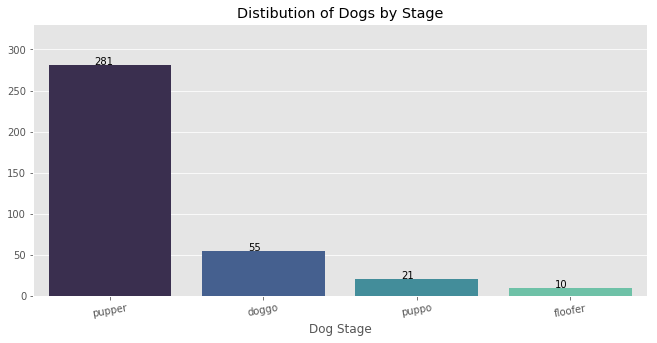

In [115]:
# Plot the Dog Stage Count
plot_attrib(dog_stage,'Dog Stage','Distibution of Dogs by Stage')

>Dogs in the pupper stage are the most tweeted, followed by doggos. Floofer is rarely posted.

### Insight 2: The most liked and retweeted Dog Breed

In [116]:
# Get the dog stages count
dog_breed = twitter_archive_final.breed.value_counts()[:10]

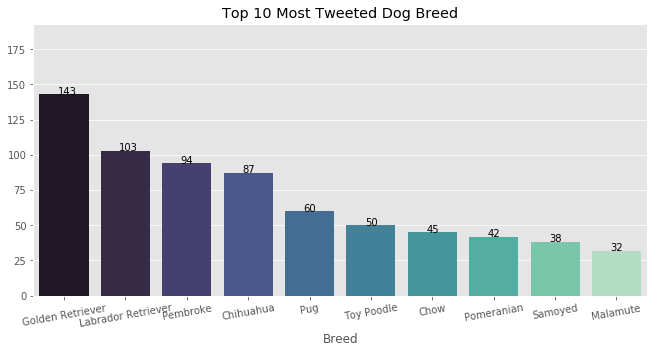

In [117]:
# First, let's plot the distribution of the Top 10 Breed
plot_attrib(dog_breed,'Breed','Top 10 Most Tweeted Dog Breed')

>Majority of the dogs displayed in the images are mostly golden retriever (n=143), labrador retriever (n=100), Pembroke (n=94) etc.

In [118]:
# This function Plots specified player attribute
def plot_attributes (attrib,value,func, top=10):
    """    
    attrib:  A categorical variables to group by
    
    value: float. Continuous variable to aggregate
    
    top: int. Optional. Determines number of categories to plot
    
    func: aggregation function (sum, mean)
    """
    
    if func=='mean':
        df = twitter_archive_final[[attrib,value]].groupby([attrib]).mean().sort_values(value,ascending=False)[:top]
    elif func=='sum':
        df = twitter_archive_final[[attrib,value]].groupby([attrib]).sum().sort_values(value,ascending=False)[:top]

    # Create figure and axes
    fig, ax = plt.subplots(figsize = (15,5))
    
    labels = df.index
    ind = np.arange(len(labels)) # xtick locations       

    ax = sns.barplot(x=labels, y=df[value].values, alpha=.9,palette='viridis')
    ax.set_xticklabels(labels=labels,rotation=15)
    ax.set_ylim([0, df[value].max()+df[value].max()*2/top])
    
    #  labels
    ax.set_ylabel('Total')
    ax.set_xlabel(attrib.title())
    ax.set_title(('Top '+ str(top)+' '+attrib+ ' By '+value.replace('_', ' ')).title())
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x()+p.get_width() / 2, p.get_height()),
                           xytext=(0, 3),textcoords="offset points",ha='center')

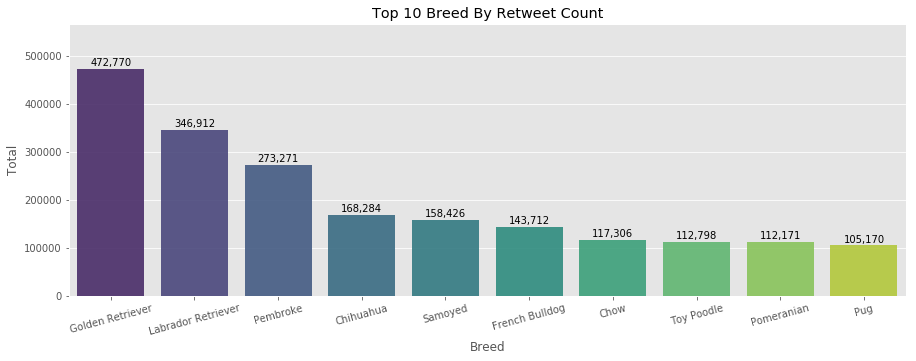

In [119]:
plot_attributes('breed','retweet_count','sum')

>Golden Retriever and Labrador Retiever lead the list of breed with highest retweets

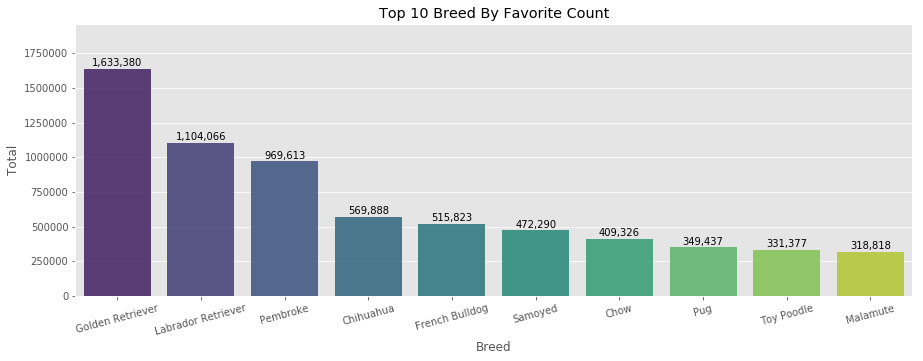

In [120]:
plot_attributes('breed','favorite_count','sum')

>Golden Retriever and Labrador Retiever lead the list of breed with most liked tweets

In [121]:
# Obtain the total tweets
twitter_archive_final['Average_total_tweet'] = twitter_archive_final.retweet_count+twitter_archive_final.favorite_count

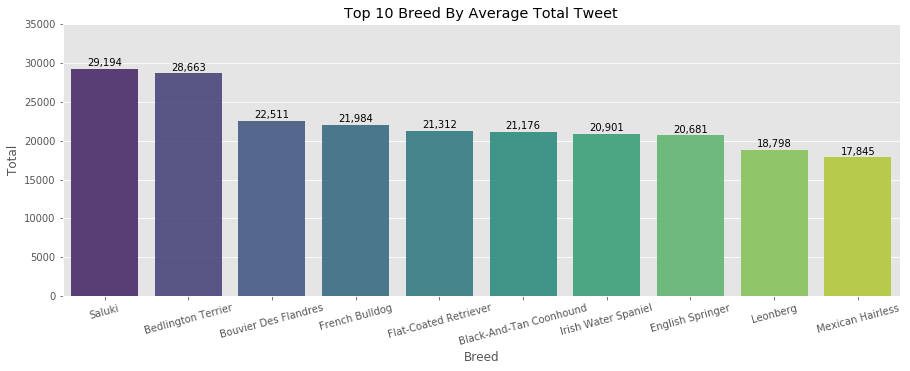

In [122]:
# Plot the average total tweets by Breed
plot_attributes('breed','Average_total_tweet',func='mean')

>Whereas Golden Retriever and Labrador Retiever lead the list of breed with most liked tweets and retweet, these two are not among the Top 10 breed with highest average total tweets.

### Insight #3: Periodic Engagement of the "WeRateDog" account

The periods are in numbers, hence we will define some functions to convert these to human understable text

In [123]:
# Day number converter function
def day_name(x):
    
    """
    x: int. 0 <= x <=7
    OUTPUT: Weekday name
    """
    if x == 0:
        return 'Monday'
    elif x == 1:
        return 'Tuesday'
    elif x == 2:
        return 'Wednesday'
    elif x == 3:
        return 'Thursday'
    elif x == 4:
        return 'Friday'
    elif x==5:
        return 'Saturday'
    elif x==6:
        return 'Sunday'
    
# Month number converter function   
def month_name(x):
    """
    x: int. 1 <= x <=12
    OUTPUT: Month name
    """
    if x==1:
        return 'January'
    elif x == 2:
        return 'February'
    elif x == 3:
        return 'March'
    elif x == 4:
        return 'April'
    elif x==5:
        return 'May'
    elif x==6:
        return 'June'
    elif x == 7:
        return 'July'
    elif x == 8:
        return 'August'
    elif x == 9:
        return 'September'
    elif x==10:
        return 'October'
    elif x==11:
        return 'November'
    elif x==12:
        return 'December'

In [124]:
# Obtain Year, Month Number, Day number and Hour Number from the timestamp column
twitter_archive_final['year']=pd.to_datetime(twitter_archive_final.timestamp).apply(lambda x: x.year)
twitter_archive_final['month_number']=pd.to_datetime(twitter_archive_final.timestamp).apply(lambda x: x.month)
twitter_archive_final['day_number']=pd.to_datetime(twitter_archive_final.timestamp).apply(lambda x: x.dayofweek)
twitter_archive_final['hour_number']=pd.to_datetime(twitter_archive_final.timestamp).apply(lambda x: x.hour)
twitter_archive_final['hour']=pd.to_datetime(twitter_archive_final.timestamp).apply(lambda x: x.strftime("%I:00 %p"))

In [125]:
# This function Plots number of tweets within a year, for specific period
def plot_period (df, period):
    
    """
    INPUT:
    df : dataframe containing the attribute column
    
    period:  A string. that determines period tweets occured. E.g hourly, monthly, daily
    
    """
    
    # obtain years in the dataset
    year = df.year.value_counts().index.sort_values()
    
    # set colors
    colors = ['tab:blue','tab:brown','darkblue']
    
    # Group data base on period specified
    if period == 'daily':
        df = df.groupby(['year','day_number'])['tweet_id'].count()
        x_lab='Day'
        
    elif period == 'monthly':
        df = df.groupby(['year','month_number'])['tweet_id'].count()
        x_lab='Month'
    
    elif period == 'hourly':
        df = df.groupby(['year','hour_number','hour'])['tweet_id'].count()
        x_lab='Hour'
        
    # Create figure and polar axes of r rows, 1 column. r = number of years
    fig, ax = plt.subplots(len(year), 1,figsize = (17,11), sharex=False)
        
    # Set width for the bars
    width=0.35
    
    for id, column in enumerate(year):
        
        if period == 'daily':
            labels = list(map(lambda x:day_name(x), df.loc[column].index))
            
        if period == 'monthly':
            labels = list(map(lambda x:month_name(x), df.loc[column].index))
            
        if period == 'hourly':
            labels = df.loc[column].reset_index()['hour']
        
        # Obtain maximum value for each year
        maxy = df.loc[column].values.max()+30
        
        # Obtain xtick labels locations
        index = np.arange(len(labels))
        
        # Plot each year 
        ax[id].bar(index, df.loc[column].values, width, alpha=.9,color=colors[id])
        
        # Set the ticks and ticklabels
        ax[id].set_xticks(index)
        ax[id].set_xticklabels(labels)
        
        # Set ylimit
        ax[id].set_ylim([0, maxy])
        
        #  Set plot labels
        ax[id].set_ylabel('Number of Tweets')
        ax[id].set_xlabel(x_lab)
        
        # Add title
        ax[id].set_title(period.title()+' Total Tweets '+'('+str(column)+')')
        
        # Add data point on the bars
        for p in ax[id].patches:
            ax[id].annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2, p.get_height()),
                           xytext=(0, 3),textcoords="offset points",ha='center')

    # Adjust the spacing between subplots
    fig.tight_layout()
    plt.show();

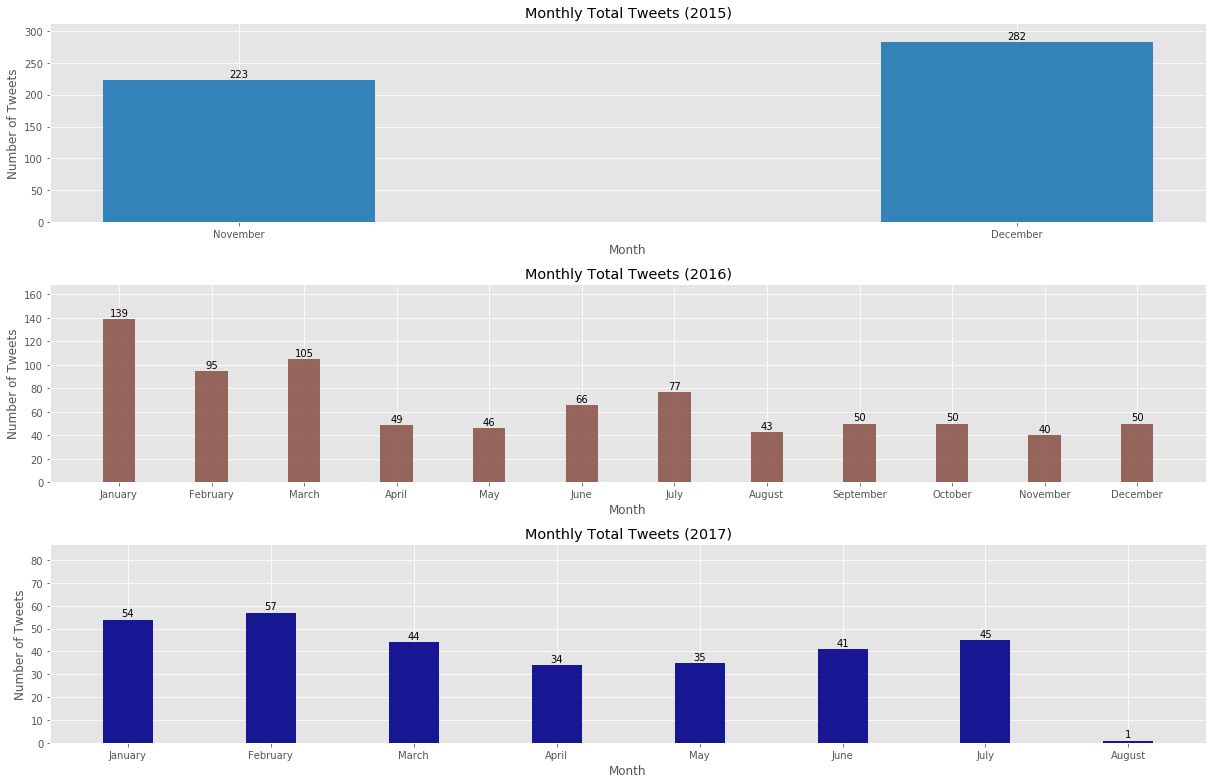

In [126]:
# Plot Monthly Tweet by year for the WeRateDod Account
plot_period(twitter_archive_final,'monthly')

>Highest monthly tweet was recorded in December 2015, a month after the account was opened.

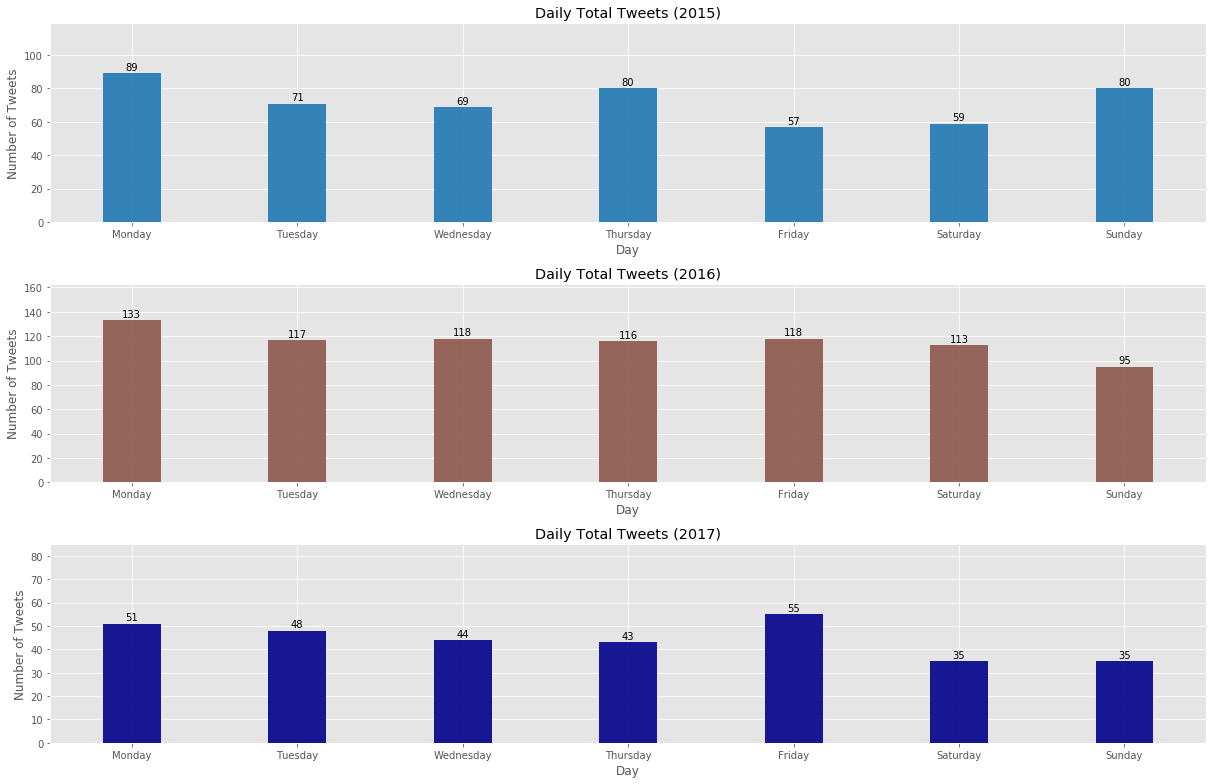

In [127]:
# daily Activities
plot_period(twitter_archive_final,'daily')

>Accross the year, Monday seems the most busy day of the account

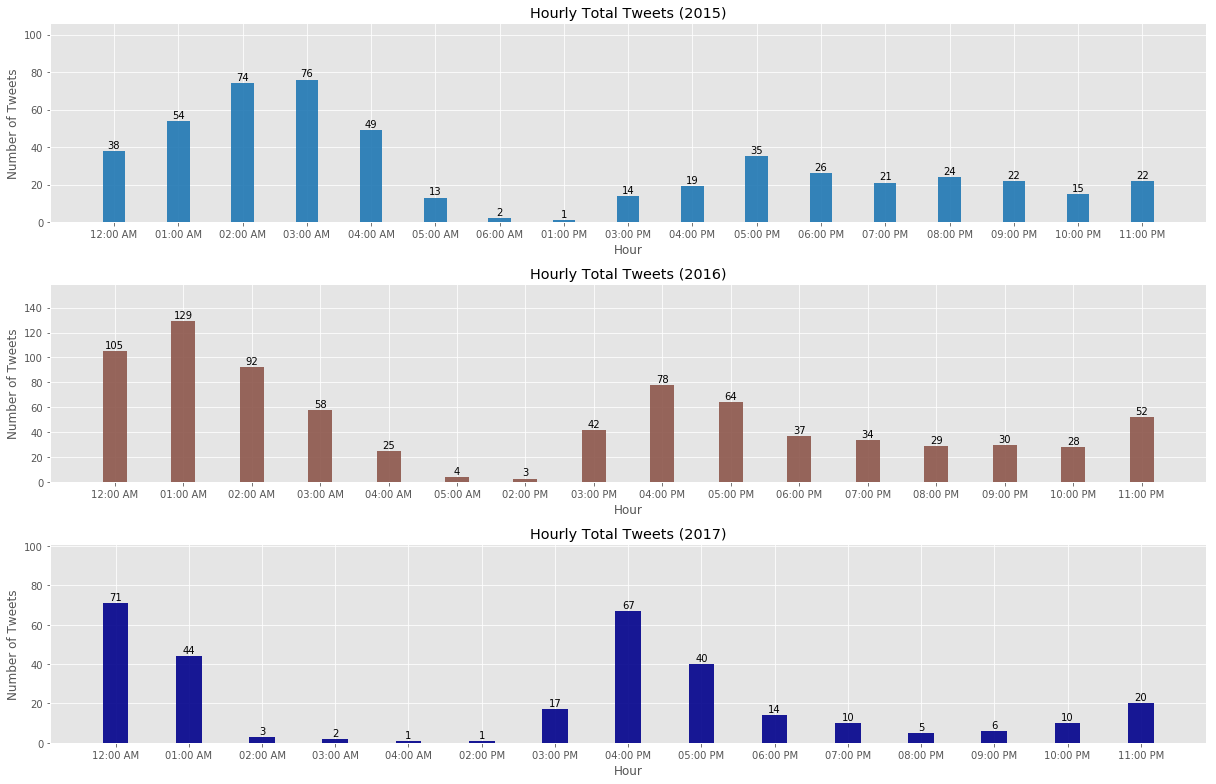

In [130]:
#plot Hourly Activity of the account by year
plot_period(twitter_archive_final,'hourly')

>The above visualization shows that most tweets happen on this account in the early midnight of the day at about 12:00am and 1:00am, and its lowest from 2:00am through to 2:00pm in the afternoon and becomes high again between 4PM to 5PM

## Conclusion
> The following insights have been drawn from wrangling and analysing the WeRateDogs data;
- Dogs in pupper stage are the most rated, followed by those in doggo stage, then puppo. Dogs in floofer stage are rarely rated.
- Golden Retriever was found to be the most popular dog breed, followed by Labrador Retriever.
- Golden Retriever and Labrador Retriever dog breeds has the most liked tweets.
- Though Golden Retriever and Labrador Retriever lead the list of breeds with most liked tweets and retweet, these two are not among the Top 10 breed with highest average total tweets.
- The highest monthly tweet was recorded in December for the year 2015.
- The highest daily tweet occurred on Monday for the year 2015.
- WeRateDog page is highly interactive in the early of midnight.